**Об участии пользователей в голосованиях в Wikipedia.org**

**Проект:**

У нас есть данные разной степени детализации об участии пользователей в голосованиях в Wikipedia.org (https://wikipedia.org/), а также статистика по пользователям о том, сколько они совершили правок и действий разного типа.

**Цель:**

На основе уже имеющихся данных провести сегментацию, анализ активности пользователей, выявить, устойчивы ли их предпочтения.

**Ход исследования:**

Данные берем из двух файлов:
- stats
- votes

**Этапы исследования:**

- Загрузка данных и изучение общей информации;
- Предобработка данных;
- Анализ данных и проверка гипотез;
- Выводы.

**Описание данных:**

Файл stats

- stats — информация о пользователях
- stats.Edits - Количество правок
- stats.Reverts - Количество отмен чужих правок
- stats.Log - Количество иных действий
- stats.Diff - Добавленное минус удалённое
- stats.Volume - Общий объём добавленного
- stats.Tot size - Накопленная сумма добавленного
- stats.Time - Время онлайн
- stats.Speed - Скорость (количество правок в единицу времени)
- stats.User - Ник пользователя
- stats.txt - Дата в текстовом формате

Файл votes

- votes — информация о голосовании
- votes.voter - Голосующий
- votes.can_vote - Проходит по критериям
- votes.time - Время голоса
- votes.candidate - Кандидат, по которому голос
- votes.n - Номер выборов, с дробными частями - довыборы
- votes.vote - Голос, 1 - за, -1 - против
- votes.lt - Суток от начала текущих выборов

##  1. Загрузка данных и изучение общей информации

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import timedelta

In [3]:
# Считываем информацию из файлов
stats = pd.read_excel('/content/sample_data/stats.xlsx')
votes = pd.read_excel('/content/sample_data/votes.xlsx')

In [5]:
# Посмотрим на таблицу stats
stats.head(10)

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,txt
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,200708
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,200708
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,200708
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,200708
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,200708
5,2000,NaN,259.0,443 k,614 k,36 M,125 h,18/h,Vizu,200708
6,2100,NaN,5.0,377 k,564 k,45 M,137 h,15/h,Michael Romanov,200708
7,2069,NaN,27.0,879 k,938 k,22 M,79 h,26/h,Ekamaloff,200708
8,1884,7.0,18.0,318 k,1.4 M,43 M,84 h,22/h,The Wrong Man,200708
9,1800,NaN,32.0,545 k,873 k,20 M,104 h,18/h,Zimin.V.G.,200708


In [6]:
# Посмотрим общую информацию по файлу о пользователях
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Edits     28950 non-null  int64  
 1   Reverts   10157 non-null  float64
 2   Log       28306 non-null  float64
 3   Diff      28945 non-null  object 
 4   Volume    28945 non-null  object 
 5   Tot size  28945 non-null  object 
 6   Time      28950 non-null  object 
 7   Speed     28950 non-null  object 
 8   User      28950 non-null  object 
 9   txt       28950 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.2+ MB


Видим что всего строк в таблице 28950, при этом столбцы Edits, Reverts, Log и txt имеют числовой формат. По первым трем столбцам числовой тип логичен, а вот для даты кажется нужно его поменять.


In [7]:
# Преобразуем дату в нужный формат
stats['txt'] = pd.to_datetime(stats['txt'], format='%Y%m')
stats.head(10)

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,txt
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,2007-08-01
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,2007-08-01
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,2007-08-01
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,2007-08-01
5,2000,NaN,259.0,443 k,614 k,36 M,125 h,18/h,Vizu,2007-08-01
6,2100,NaN,5.0,377 k,564 k,45 M,137 h,15/h,Michael Romanov,2007-08-01
7,2069,NaN,27.0,879 k,938 k,22 M,79 h,26/h,Ekamaloff,2007-08-01
8,1884,7.0,18.0,318 k,1.4 M,43 M,84 h,22/h,The Wrong Man,2007-08-01
9,1800,NaN,32.0,545 k,873 k,20 M,104 h,18/h,Zimin.V.G.,2007-08-01


Видим что данные в столбце txt изменились, для проверки формата вызовем stats.info() По данным которого понятно что преобразование прошло успешно.

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Edits     28950 non-null  int64         
 1   Reverts   10157 non-null  float64       
 2   Log       28306 non-null  float64       
 3   Diff      28945 non-null  object        
 4   Volume    28945 non-null  object        
 5   Tot size  28945 non-null  object        
 6   Time      28950 non-null  object        
 7   Speed     28950 non-null  object        
 8   User      28950 non-null  object        
 9   txt       28950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 2.2+ MB


In [9]:
# Так же для более удобного использования переименуем название столбца txt в Date
stats.columns = stats.columns.str.replace('txt', 'Date')
stats.head(10)

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,Date
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,2007-08-01
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,2007-08-01
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,2007-08-01
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,2007-08-01
5,2000,NaN,259.0,443 k,614 k,36 M,125 h,18/h,Vizu,2007-08-01
6,2100,NaN,5.0,377 k,564 k,45 M,137 h,15/h,Michael Romanov,2007-08-01
7,2069,NaN,27.0,879 k,938 k,22 M,79 h,26/h,Ekamaloff,2007-08-01
8,1884,7.0,18.0,318 k,1.4 M,43 M,84 h,22/h,The Wrong Man,2007-08-01
9,1800,NaN,32.0,545 k,873 k,20 M,104 h,18/h,Zimin.V.G.,2007-08-01


## 2. Предобработка данных

### 2.1 Stats. Пропуски и дубликаты

In [10]:
# Проверим количество пропусков
na = stats.isna().sum().sort_values()
na_perc = round(stats.isna().mean()*100,2).sort_values()
display(pd.DataFrame({'Количество пропусков':na,'% пропусков':na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))

,Количество пропусков,% пропусков
Edits,0.00,0.00
Time,0.00,0.00
Speed,0.00,0.00
User,0.00,0.00
Date,0.00,0.00
Diff,5.00,0.02
Volume,5.00,0.02
Tot size,5.00,0.02
Log,644.00,2.22
Reverts,18793.00,64.92


По пропускам катина вцелом приемлема. Больше всего пропусков содержит столбец Reverts - Количество отмен чужих правок. И логично предположить что у пользователя может не быть отмен чужих правок.

In [11]:
# Проверим данные на явные дубликаты
stats.duplicated().sum()

0

Как и ожидалось явных дубликатов не обнаружено

In [12]:
# Проверим данные на явные дубликаты по юзеру и дате
stats[['User', 'Date']].duplicated().sum()

0

### 2.2 Stats. Преобразования Diff, Volume и Tot size в число

In [13]:
# Для преобразования столбцов Diff, Volume и Tot size в числовые значения для начала уберем вот эту часть строки '\xa0'
stats['Diff'] = stats['Diff'].apply(lambda x: x.replace('\xa0', '') if isinstance(x, str) else str(x))
stats['Volume'] = stats['Volume'].apply(lambda x: x.replace('\xa0', '') if isinstance(x, str) else str(x))
stats['Tot size'] = stats['Tot size'].apply(lambda x: x.replace('\xa0', '') if isinstance(x, str) else str(x))
stats.head(10)

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,Date
0,1589,NaN,1621.0,262k,1.1M,39M,95 h,34/h,Altes,2007-08-01
1,1809,NaN,1328.0,395k,2.8M,42M,129 h,24/h,Obersachse,2007-08-01
2,2734,NaN,NaN,16k,15k,19M,105 h,26/h,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278k,350k,43M,135 h,19/h,User№101,2007-08-01
4,917,6.0,1416.0,154k,1.2M,26M,98 h,24/h,Kalan,2007-08-01
5,2000,NaN,259.0,443k,614k,36M,125 h,18/h,Vizu,2007-08-01
6,2100,NaN,5.0,377k,564k,45M,137 h,15/h,Michael Romanov,2007-08-01
7,2069,NaN,27.0,879k,938k,22M,79 h,26/h,Ekamaloff,2007-08-01
8,1884,7.0,18.0,318k,1.4M,43M,84 h,22/h,The Wrong Man,2007-08-01
9,1800,NaN,32.0,545k,873k,20M,104 h,18/h,Zimin.V.G.,2007-08-01


In [14]:
# Затем напишем функцию чтобы вместо буквенных значений 'к' и 'М' получить числовые
def convert_to_float(value):
    if pd.isnull(value):
        return value
    elif 'k' in value:
        return float(value.replace('k', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)

# Применяем функцию к нашим столбцам
stats['Diff'] = stats['Diff'].apply(lambda x: convert_to_float(x))
stats['Volume'] = stats['Volume'].apply(lambda x: convert_to_float(x))
stats['Tot size'] = stats['Tot size'].apply(lambda x: convert_to_float(x))

In [15]:
# Для проверки выведем талицу
stats.head(10)

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,Date
0,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,95 h,34/h,Altes,2007-08-01
1,1809,NaN,1328.0,395000.0,2800000.0,42000000.0,129 h,24/h,Obersachse,2007-08-01
2,2734,NaN,NaN,16000.0,15000.0,19000000.0,105 h,26/h,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278000.0,350000.0,43000000.0,135 h,19/h,User№101,2007-08-01
4,917,6.0,1416.0,154000.0,1200000.0,26000000.0,98 h,24/h,Kalan,2007-08-01
5,2000,NaN,259.0,443000.0,614000.0,36000000.0,125 h,18/h,Vizu,2007-08-01
6,2100,NaN,5.0,377000.0,564000.0,45000000.0,137 h,15/h,Michael Romanov,2007-08-01
7,2069,NaN,27.0,879000.0,938000.0,22000000.0,79 h,26/h,Ekamaloff,2007-08-01
8,1884,7.0,18.0,318000.0,1400000.0,43000000.0,84 h,22/h,The Wrong Man,2007-08-01
9,1800,NaN,32.0,545000.0,873000.0,20000000.0,104 h,18/h,Zimin.V.G.,2007-08-01


### 2.3 Stats. Преобразования Time в формат времени

In [16]:
# Перед тем как двигаться дальше выведем две строки, значения которых возьмем для проверки результата преобразования. Это сроки 0 и 1421
stats.loc[0, 'Time']

'95\xa0h'

In [ ]:
stats.loc[1421, 'Time']

'14\xa0h\xa010'

In [17]:
# Следующий шаг это преобразование столбца Time. Начнем так же с удаления значений из строки '\xa0'
stats['Time'] = stats['Time'].apply(lambda x: x.replace('\xa0', '') if isinstance(x, str) else str(x))
stats

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,Date
0,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,95h,34/h,Altes,2007-08-01
1,1809,NaN,1328.0,395000.0,2800000.0,42000000.0,129h,24/h,Obersachse,2007-08-01
2,2734,NaN,NaN,16000.0,15000.0,19000000.0,105h,26/h,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278000.0,350000.0,43000000.0,135h,19/h,User№101,2007-08-01
4,917,6.0,1416.0,154000.0,1200000.0,26000000.0,98h,24/h,Kalan,2007-08-01
...,...,...,...,...,...,...,...,...,...,...
28945,621,13.0,23.0,127000.0,151000.0,20000000.0,34h,19/h,Nchernov29,2023-08-01
28946,417,8.0,254.0,382000.0,382000.0,3600000.0,16h40,40/h,Winterpool,2023-08-01
28947,566,35.0,31.0,561000.0,678000.0,42000000.0,41h,14/h,Emil.arg,2023-08-01
28948,475,35.0,148.0,65000.0,81000.0,10000000.0,41h,15/h,Lumaca,2023-08-01


In [18]:
# Затем так же напишем функцию для преобразования полученной строки в сумму минут
def transform_value(value):
    if 'h' in value:
        parts = value.split('h')
        before_h = int(parts[0])
        if parts[1] != '':
            after_h = int(parts[1])
        else:
            after_h = 0
        total_minutes = (before_h * 60) + after_h
        return total_minutes
    elif 'm' in value:
        parts = value.split('m')
        minutes = int(parts[0])
        return minutes
    else:
        return value

# Применим функцию к нашему столбцу
stats['Time'] = stats['Time'].apply(transform_value)


In [19]:
# Для проверки выведем два значения строки 0 и 1421
stats.loc[0, 'Time']

5700

In [20]:
stats.loc[1421, 'Time']

850

Как видим преобразование прошло успешно, так как в строке 0 у нас было 95 часов, а это 5700 минут. Аналогично в строке 1421 - 14 часов и 10 минут что равно 850 минутам.

### 2.4 Stats. Преобразования Speed в число

In [21]:
# Осталось преобразовать только столбец Speed. Но перед этим так же выведем два числа как ориентир для проверки
stats.loc[0, 'Speed']

'34/h'

In [22]:
stats.loc[27321, 'Speed']

'11/m'

In [23]:
# Напишем еще одну функицию для преобразования
def transform_value_s(value):
    parts = value.split('/')
    num = int(parts[0])
    unit = parts[1]
    if unit == 'm':
        return num
    elif unit == 'h':
        return num * 60
    else:
        return value
# И применим к столбцу
stats['Speed'] = stats['Speed'].apply(transform_value_s)

In [24]:
stats.loc[0, 'Speed']

2040

In [25]:
stats.loc[27321, 'Speed']

11

Видим что функция отработала корректно, так как минуты не менялись а часы преобразовны в минуты.

In [26]:
stats.head(10)

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,Date
0,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01
1,1809,NaN,1328.0,395000.0,2800000.0,42000000.0,7740,1440,Obersachse,2007-08-01
2,2734,NaN,NaN,16000.0,15000.0,19000000.0,6300,1560,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278000.0,350000.0,43000000.0,8100,1140,User№101,2007-08-01
4,917,6.0,1416.0,154000.0,1200000.0,26000000.0,5880,1440,Kalan,2007-08-01
5,2000,NaN,259.0,443000.0,614000.0,36000000.0,7500,1080,Vizu,2007-08-01
6,2100,NaN,5.0,377000.0,564000.0,45000000.0,8220,900,Michael Romanov,2007-08-01
7,2069,NaN,27.0,879000.0,938000.0,22000000.0,4740,1560,Ekamaloff,2007-08-01
8,1884,7.0,18.0,318000.0,1400000.0,43000000.0,5040,1320,The Wrong Man,2007-08-01
9,1800,NaN,32.0,545000.0,873000.0,20000000.0,6240,1080,Zimin.V.G.,2007-08-01


### 2.5 Stats. Переименование столбцов

In [27]:
# И последним шагом переименуем столбцы. Иначе после объединения таблиц у нас будут различия в именовании. А так же изменим название столбца tot size на  tot_size
stats.columns = stats.columns.str.lower()
stats.rename(columns={'tot size': 'tot_size'}, inplace=True)
stats.head(10)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date
0,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01
1,1809,NaN,1328.0,395000.0,2800000.0,42000000.0,7740,1440,Obersachse,2007-08-01
2,2734,NaN,NaN,16000.0,15000.0,19000000.0,6300,1560,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278000.0,350000.0,43000000.0,8100,1140,User№101,2007-08-01
4,917,6.0,1416.0,154000.0,1200000.0,26000000.0,5880,1440,Kalan,2007-08-01
5,2000,NaN,259.0,443000.0,614000.0,36000000.0,7500,1080,Vizu,2007-08-01
6,2100,NaN,5.0,377000.0,564000.0,45000000.0,8220,900,Michael Romanov,2007-08-01
7,2069,NaN,27.0,879000.0,938000.0,22000000.0,4740,1560,Ekamaloff,2007-08-01
8,1884,7.0,18.0,318000.0,1400000.0,43000000.0,5040,1320,The Wrong Man,2007-08-01
9,1800,NaN,32.0,545000.0,873000.0,20000000.0,6240,1080,Zimin.V.G.,2007-08-01


### 2.6 Vote. Общая информация

In [28]:
# Следующим шагом проведем предобработку файла votes. И начнем с общей информации по файлу
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79074 entries, 0 to 79073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voter      79074 non-null  object 
 1   can_vote   79074 non-null  bool   
 2   time       79074 non-null  object 
 3   candidate  79074 non-null  object 
 4   n          79074 non-null  float64
 5   vote       79074 non-null  int64  
 6   lt         79074 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 3.7+ MB


Из полученной информации сразу можно сделать вывод что в данной таблице у нас нет пустых значений. Это плюс. Но при этом есть столбец time в формате текста, который стоит перевести в дату.

In [29]:
votes.head(10)

,voter,can_vote,time,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611
5,Altes,True,2008-11-23 00:34:00,Ilya Voyager,7.0,1,0.023611
6,Altes,True,2008-11-23 00:34:00,Kv75,7.0,1,0.023611
7,Altes,True,2008-11-23 00:34:00,Ukkon,7.0,-1,0.023611
8,Altes,True,2008-11-23 00:34:00,Александр Сигачёв,7.0,1,0.023611
9,Yaroslav Blanter,True,2008-11-23 00:38:00,EvgenyGenkin,7.0,1,0.026389


### 2.7 Vote. Преобразование Time в формат времени

In [30]:
# Как и в таблице stats воспользуемся методом to_datetime и преобразуем дату в нужный формат
votes['time'] = pd.to_datetime(votes['time'], format='%Y%m%d %H:%M:%S')
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79074 entries, 0 to 79073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   voter      79074 non-null  object        
 1   can_vote   79074 non-null  bool          
 2   time       79074 non-null  datetime64[ns]
 3   candidate  79074 non-null  object        
 4   n          79074 non-null  float64       
 5   vote       79074 non-null  int64         
 6   lt         79074 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


Как видим формат столбца изменился на datetime64.

### 2.8 Объединение таблиц

In [31]:
# Перед тем как объединить таблицы переименуме столбец voter в User
votes.rename(columns={'voter': 'user', 'time' : 'time_of_vote'}, inplace=True)
votes.head(10)

,user,can_vote,time_of_vote,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611
5,Altes,True,2008-11-23 00:34:00,Ilya Voyager,7.0,1,0.023611
6,Altes,True,2008-11-23 00:34:00,Kv75,7.0,1,0.023611
7,Altes,True,2008-11-23 00:34:00,Ukkon,7.0,-1,0.023611
8,Altes,True,2008-11-23 00:34:00,Александр Сигачёв,7.0,1,0.023611
9,Yaroslav Blanter,True,2008-11-23 00:38:00,EvgenyGenkin,7.0,1,0.026389


In [32]:
# После чего объединяем таблицы в одну с помощью метода merge
new_data = pd.merge(stats, votes, on='user')

In [33]:
new_data.head(10)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date,can_vote,time_of_vote,candidate,n,vote,lt
0,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
1,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
2,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611
3,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2008-11-23 00:34:00,Ilya Voyager,7.0,1,0.023611
4,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2008-11-23 00:34:00,Kv75,7.0,1,0.023611
5,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2008-11-23 00:34:00,Ukkon,7.0,-1,0.023611
6,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2008-11-23 00:34:00,Александр Сигачёв,7.0,1,0.023611
7,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2009-05-24 00:26:00,DR,8.0,1,0.018056
8,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2009-05-24 00:26:00,Victoria,8.0,1,0.018056
9,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,True,2009-05-24 00:26:00,Testus,8.0,1,0.018056


In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691595 entries, 0 to 1691594
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   edits         int64         
 1   reverts       float64       
 2   log           float64       
 3   diff          float64       
 4   volume        float64       
 5   tot_size      float64       
 6   time          int64         
 7   speed         int64         
 8   user          object        
 9   date          datetime64[ns]
 10  can_vote      bool          
 11  time_of_vote  datetime64[ns]
 12  candidate     object        
 13  n             float64       
 14  vote          int64         
 15  lt            float64       
dtypes: bool(1), datetime64[ns](2), float64(7), int64(4), object(2)
memory usage: 208.1+ MB


После объединения видим что количество строк в датасе составило 1691595. Что логично так как у каждого юзера появилось по несколько строк.

## 3. Анализ данных и проверка гипотез

### 3.1 Rfm анализ

In [35]:
# Переходим к rfm анализу. Для этого определим дату которая будет отправной точкой анализа(max_date). За дату возьмем последнюю дату из датафрейма + один день.
max_date = stats['date'].max() + timedelta(days = 1)
max_date

Timestamp('2023-08-02 00:00:00')

In [36]:
# После чего сформируем необходимую таблицу. При этом для recency возьмем разницу дат между отправной точкой max_date и последней датой активности юзера.
# Для Frequency посчитаем сумму всех правок и для Monetary накопленную сумму добавленного.
rfm = stats.groupby(['user']).agg({
    'date': lambda x : (max_date - x.max()).days,
    'edits': 'sum',
    'tot_size': 'sum'})
rfm.rename(columns = { 'date': 'rec',
                       'edits': 'fre',
                       'tot_size': 'mon'}, inplace = True )
rfm.head(10)

,rec,fre,mon
user,,,
-kgoodluck-,62,2801,119000000.0
0lesja Sh,4049,822,8200000.0
0x0F,2526,620,17000000.0
1.b2-b4,2253,3998,55000000.0
102RB,4688,787,9800000.0
1234qwer1234qwer4,123,36188,723800000.0
15region,3987,1756,14000000.0
1677venzel gottorpskij,305,2587,86000000.0
18mk,2223,10005,708000000.0


<Axes: xlabel='mon', ylabel='Count'>

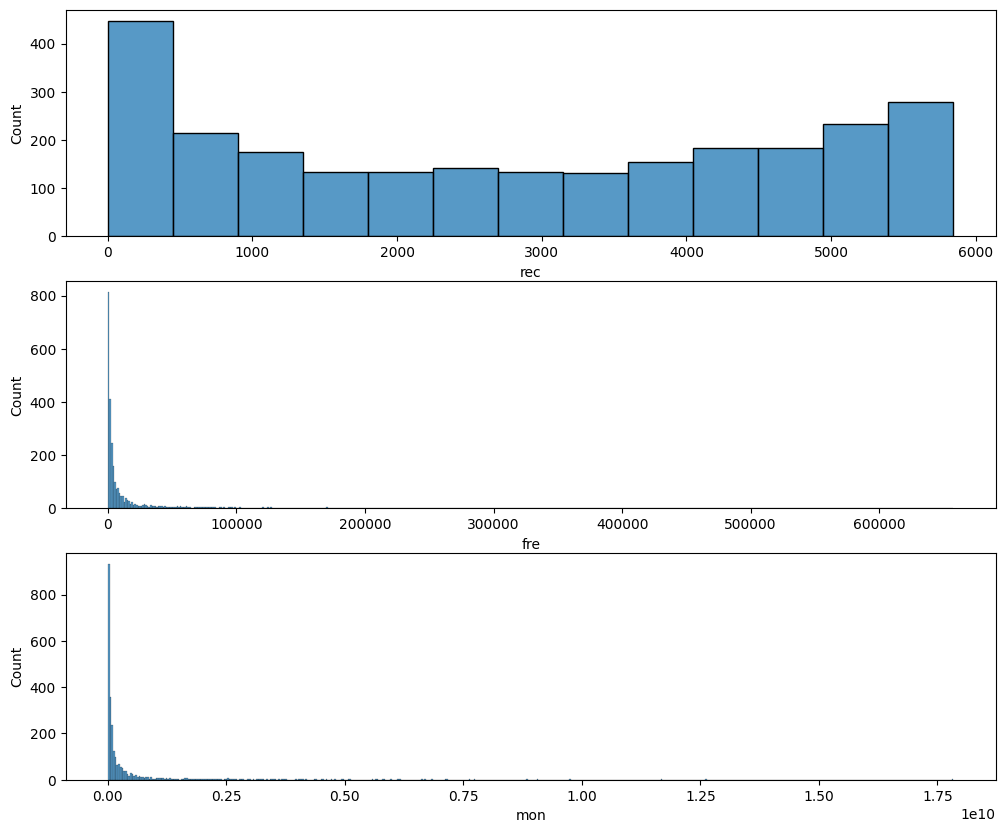

In [37]:
# Посмотрим на распределение получившихся значений
plt.figure(figsize=(12, 10))
plt.subplot(3,1,1); sns.histplot(rfm['rec'])
plt.subplot(3,1,2); sns.histplot(rfm['fre'])
plt.subplot(3,1,3); sns.histplot(rfm['mon'])

Если посмотреть на распределение по первому показателю. А именно сколько дней назад пользователь совершал какие либо действия. При условии что за текущую дату мы взяли 2023-08-02. Видим что больше всего пользователей у нас взаимодействовали с сайтом относительно недовно от 0 до 500 дней. А на втором месте пользователи кто был активен очень давно от 5 до 6 тыс дней. А вот показатели по количеству правок и сумме добавленного показывают одинаковое распределение. То есть пик пользователей на графике это пользователи совершившие меньше всего правок и с наименьшей суммой добавленного.

In [38]:
# Для более удобной работы с данными используем функцию np.log
rfm['rec_log'] = np.where(rfm['rec'] == 0, 0, np.log(rfm['rec']))
rfm['fre_log'] = np.where(rfm['fre'] == 0, 0, np.log(rfm['fre']))
rfm['mon_log'] = np.where(rfm['mon'] == 0, 0, np.log(rfm['mon']))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='mon_log', ylabel='Count'>

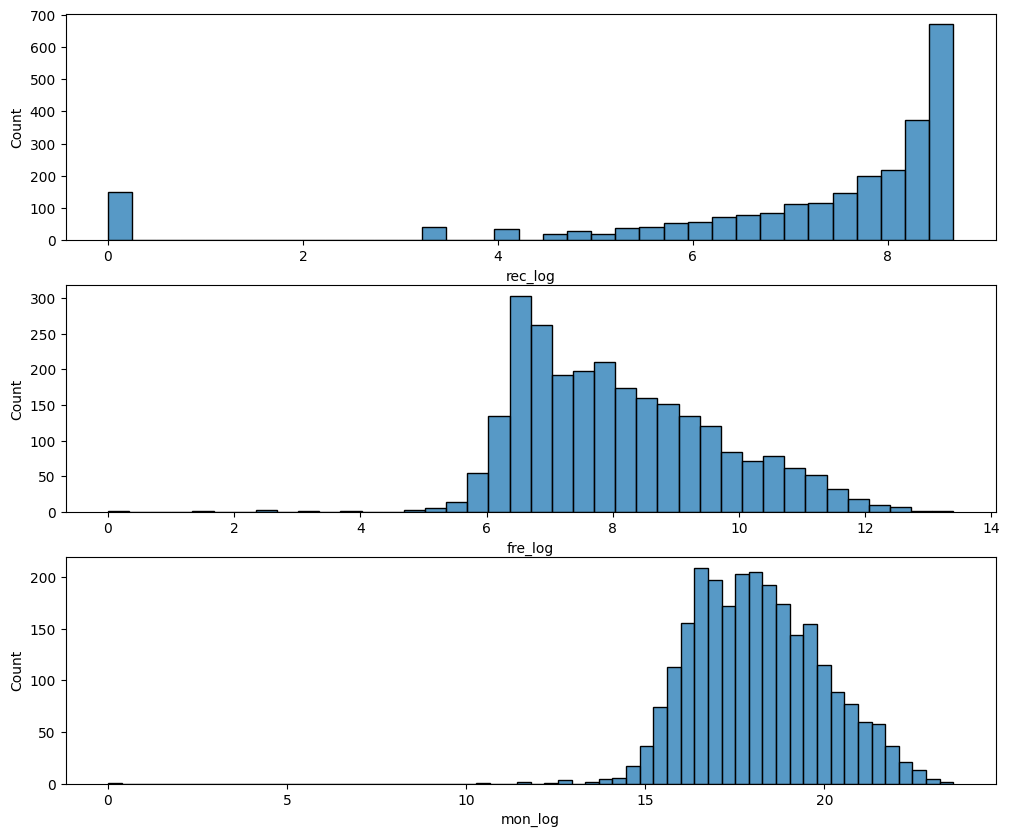

In [39]:
# После чего еще раз посмотрим на распределение
plt.figure(figsize=(12, 10))
plt.subplot(3,1,1); sns.histplot(rfm['rec_log'])
plt.subplot(3,1,2); sns.histplot(rfm['fre_log'])
plt.subplot(3,1,3); sns.histplot(rfm['mon_log'])

Как видим после преобразования распределение стало более похоже на нормальное. С такими данными будет удобнее работать.

In [40]:
# Следующим шагом проранжируем поля rec_log, fre_log и mon_log. При этом для поля rec_log выберем ранги от 5 до нуля.
# То есть чем больше времени прошло с момента последней активности пользователя тем меньше будет значение ранга. А для двух остальных столбцов ранги от 1 до 5.
r_seg = pd.cut(rfm['rec_log'], bins = 5, labels = range(5, 0, -1))
f_seg = pd.cut(rfm['fre_log'], bins = 5, labels = range(1, 6))
m_seg = pd.cut(rfm['mon_log'], bins = 5, labels = range(1, 6))
rfm = rfm.assign(R = r_seg, F = f_seg, M = m_seg)
rfm.head(10)

,rec,fre,mon,rec_log,fre_log,mon_log,R,F,M
user,,,,,,,,,
-kgoodluck-,62,2801,119000000.0,4.127134,7.937732,18.594634,3,3,4
0lesja Sh,4049,822,8200000.0,8.306225,6.711740,15.919645,1,3,4
0x0F,2526,620,17000000.0,7.834392,6.429719,16.648724,1,3,4
1.b2-b4,2253,3998,55000000.0,7.720018,8.293550,17.822844,1,4,4
102RB,4688,787,9800000.0,8.452761,6.668228,16.097893,1,3,4
1234qwer1234qwer4,123,36188,723800000.0,4.812184,10.496483,20.400026,3,4,5
15region,3987,1756,14000000.0,8.290794,7.470794,16.454568,1,3,4
1677venzel gottorpskij,305,2587,86000000.0,5.720312,7.858254,18.269858,2,3,4
18mk,2223,10005,708000000.0,7.706613,9.210840,20.377955,1,4,5


Видим что нужные столбцы сформировались и можно двигаться дальше.

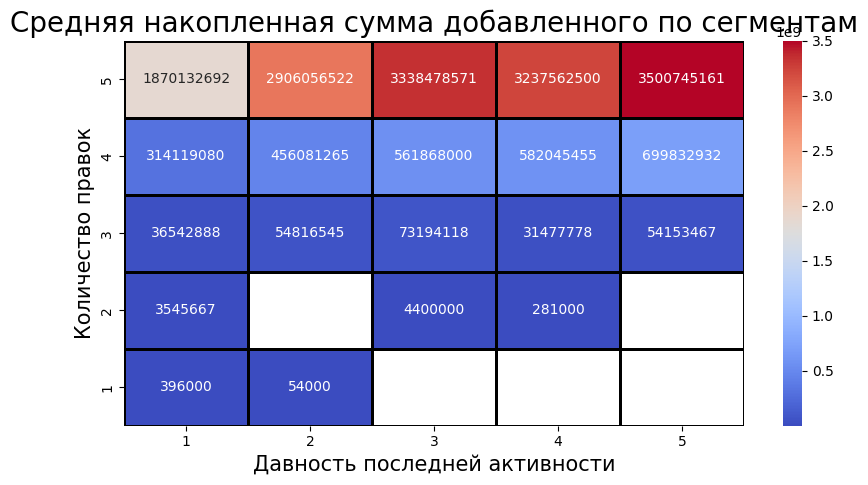

In [42]:
# Затем формируем сводную таблицу. В которой по оси икс у нас будут ранги значений по давности активности пользвателя, а по оси игрек среднее количество правок.
# Для большей наглядности отобразим таблицу через хитмап.
rfm_table = rfm.pivot_table(
    index = 'F',
    columns = 'R',
    values = 'mon',
    aggfunc = np.mean)
plt.figure(figsize = (10,5))
sns.heatmap(rfm_table, annot = True, fmt='.0f', linewidths = 1, linecolor = 'black',
            cmap = 'coolwarm')
plt.title('Средняя накопленная сумма добавленного по сегментам', fontsize = 20, color = 'black')
plt.xlabel('Давность последней активности', fontsize =15, color = 'black')
plt.ylabel('Количество правок', fontsize = 15, color = 'black')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Исходя из полученного графика видим, что больше всего объем добавленного у тех кто вносит больше всего правок. Что логично. Но при этом чем меньше времени прошло с момента активности пользователя тем больше накопленная сумма добавленного. То есть больше добавленного у тех кто активничал недавно и меньше у тех кто проявлял активность давно.

In [43]:
# Чтобы посмотреть на средние величины по более обобщенным группам, соберем еще одну сводную таблицу. Только теперь с помощь словаря мы украпним сегменты.
segm_map = {
    r'[1-3][1-3]' : 'Давние-не активные',
    r'[4-5][1-3]' : 'Не давние-не активные',
    r'[1-3][4-5]' : 'Давние-активные',
    r'[4-5][4-5]' : 'Не давние-активные',
}
rfm['Segment'] = rfm['R'].astype(str)+rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segm_map, regex = True)

In [44]:
# После чего сформируем саму таблицу с помощью groupby
rfm_level_agg = rfm.groupby('Segment').agg({
    'rec':['mean'],
    'fre':['mean'],
    'mon':['mean', 'count']
}).round(0)
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['Среднее количество дней', 'Среднее количество правок', 'Средняя сумма накопленного', 'Количество чел. в категории']
rfm_level_agg.sort_values(by = 'Количество чел. в категории', ascending = False)

,Среднее количество дней,Среднее количество правок,Средняя сумма накопленного,Количество чел. в категории
Segment,,,,
Давние-не активные,3415.0,1255.0,3.935400e+07,1360
Давние-активные,2443.0,20617.0,6.005273e+08,991
Не давние-активные,7.0,60074.0,1.859633e+09,165
Не давние-не активные,13.0,1536.0,4.383532e+07,25


На основании полученной таблицы можно сказать о том что больше всего, а именно долю в 93% занимают две группы пользователей:
- 'Давние-не активные'
- 'Давние-активные'
При этом с момента последней активности пользователя прошло более 2443 дня, что составляет более 6 лет.

При этом по количеству правок лидирует группа 'Не давние-активные' со средним значением по группе в 60074.

**Вывод:**

1) График показывает, что пользователи, которые вносят больше правок, вносят больший объем добавленной информации. Это логично и указывает на положительную корреляцию между количеством правок и объемом добавленной информации.

2) Существует обратная зависимость между временем, прошедшим с момента последней активности пользователя, и накопленной суммой добавленной информации. Пользователи, которые активны недавно, обычно имеют большую накопленную сумму добавленной информации по сравнению с пользователями, которые были неактивны в течение длительного времени. Это говорит о том, что недавняя активность связана с большим объемом добавленной информации.

3) Из таблицы видно, что две группы пользователей, "Давние-не активные" и "Давние-активные", занимают наибольшую долю - 93%. Эти группы неактивны уже более 2443 дней, что составляет более 6 лет. При этом группа "Не давние-активные" имеет наибольшее среднее количество правок в группе, равное 60074.



### 3.2 Столбец правок

In [47]:
# Проверим среднее значение провок по месяцам по файлу stats.
mean_edits = stats.groupby('date')['edits'].mean()
mean_edits

date
2007-08-01     717.333333
2007-09-01     757.613333
2007-10-01     716.046667
2007-11-01     689.213333
2007-12-01     666.600000
                 ...     
2023-04-01    1144.626667
2023-05-01    1185.700000
2023-06-01    1072.253333
2023-07-01    1263.813333
2023-08-01    1249.080000
Name: edits, Length: 193, dtype: float64

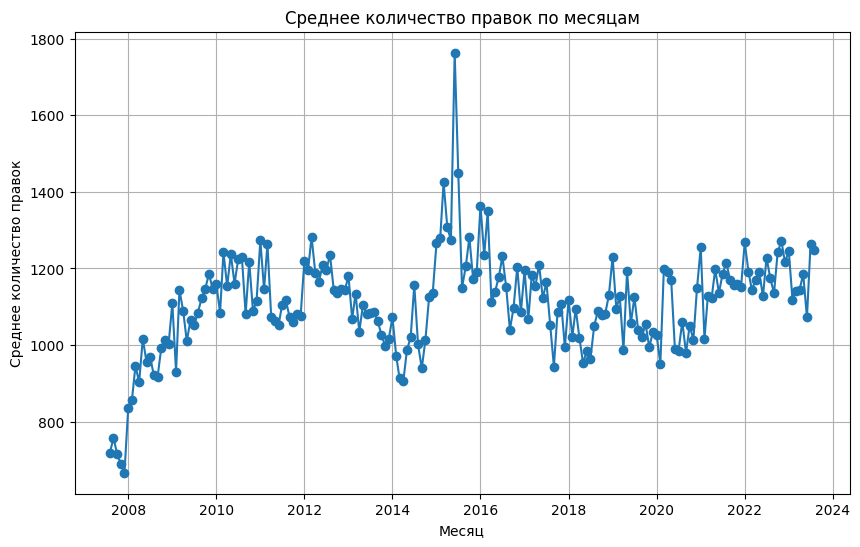

In [49]:
# Построим график
plt.figure(figsize=(10, 6))
plt.plot(mean_edits.index, mean_edits.values, marker='o')
plt.title('Среднее количество правок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество правок')
plt.grid(True)
plt.show()

На основании полученных данные возникает ощущение что среднее число правок увеличивается. Для проверки проведем группировку данных по году.

In [50]:
# Чтобы посмотреть на распределение правок по годам добавим столбец Year
stats['year'] = stats['date'].dt.year
stats.head(10)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date,year
0,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,5700,2040,Altes,2007-08-01,2007
1,1809,NaN,1328.0,395000.0,2800000.0,42000000.0,7740,1440,Obersachse,2007-08-01,2007
2,2734,NaN,NaN,16000.0,15000.0,19000000.0,6300,1560,Monegasque~ruwiki,2007-08-01,2007
3,2611,NaN,6.0,278000.0,350000.0,43000000.0,8100,1140,User№101,2007-08-01,2007
4,917,6.0,1416.0,154000.0,1200000.0,26000000.0,5880,1440,Kalan,2007-08-01,2007
5,2000,NaN,259.0,443000.0,614000.0,36000000.0,7500,1080,Vizu,2007-08-01,2007
6,2100,NaN,5.0,377000.0,564000.0,45000000.0,8220,900,Michael Romanov,2007-08-01,2007
7,2069,NaN,27.0,879000.0,938000.0,22000000.0,4740,1560,Ekamaloff,2007-08-01,2007
8,1884,7.0,18.0,318000.0,1400000.0,43000000.0,5040,1320,The Wrong Man,2007-08-01,2007
9,1800,NaN,32.0,545000.0,873000.0,20000000.0,6240,1080,Zimin.V.G.,2007-08-01,2007


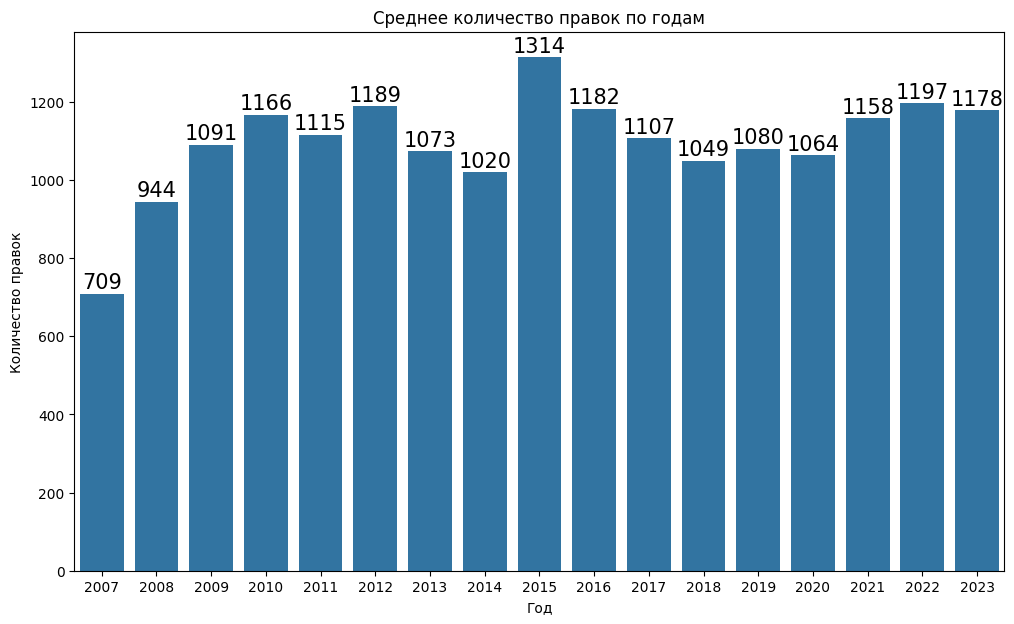

In [51]:
# После чего построим график
edit_year = pd.DataFrame({'Year': stats['year'].sort_values().unique().tolist(),
                   'Mean': stats.groupby('year')['edits'].mean().tolist()})
edit_year.sort_values('Year', inplace=True)

plt.figure(figsize=(12, 7))

plots = sns.barplot(x=edit_year['Year'],
                    y=edit_year['Mean'],
                    data=edit_year)


for bar in plots.patches:

  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel("Год", size=10)
plt.ylabel("Количество правок", size=10)
plt.title("Среднее количество правок по годам")
plt.show()

По графику можно сказать, что в среднем меньше всего правок было сделано в 2008 году, а больше всего в 2015. При этом заметна тенденция к увеличению. Данные подтверждают предположение. Данные за 2007 и 2023 мы не можем учитывать так как у нас есть информация не за весь год.

In [53]:
# Следующим этапом попробуем сегментировать пользователей по этому признаку
stats['seg'] = pd.cut(stats['edits'], bins = [0,15000,30000,45000,56001])
stats.groupby(['seg'])['user'].count()


seg
(0, 15000]        28921
(15000, 30000]       21
(30000, 45000]        2
(45000, 56001]        1
Name: user, dtype: int64

После разделения пользователей на сегменты по количеству правок можно сказать что 99% пользователей совершают не более 15000 правок.

In [54]:
# Посмотрим детальнее на показатели столбца с использованием describe
stats['edits'].describe()

count    28950.000000
mean      1108.418860
std       1079.105738
min          0.000000
25%        656.000000
50%        865.000000
75%       1254.000000
max      56001.000000
Name: edits, dtype: float64

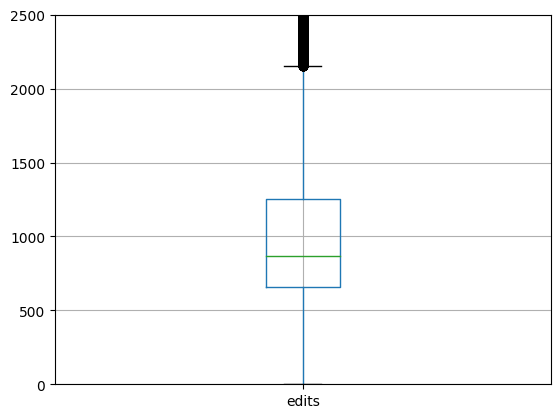

In [55]:
# А так же для наглядности построим boxplot
stats.boxplot(column = ['edits'])
plt.ylim(0,2500)
plt.show()

В результате видим что минимально значение по столбцу правок = 0, а максимальное 56001. При этом основная часть данных находится в районе от 0 до 2000 правок. Медианное значение составило 865 правок.

In [56]:
# Теперь когда мы знаем что основное количество пользователей делает в среднем не более 2000 правок, скорректируем наши группы
stats['seg'] = pd.cut(stats['edits'], bins = [0,750,1200,56001], labels=["Мало", "Средне", "Много"])
stats.groupby(['seg'])['user'].count()


seg
Мало      10756
Средне    10314
Много      7875
Name: user, dtype: int64

<Figure size 1500x1000 with 0 Axes>

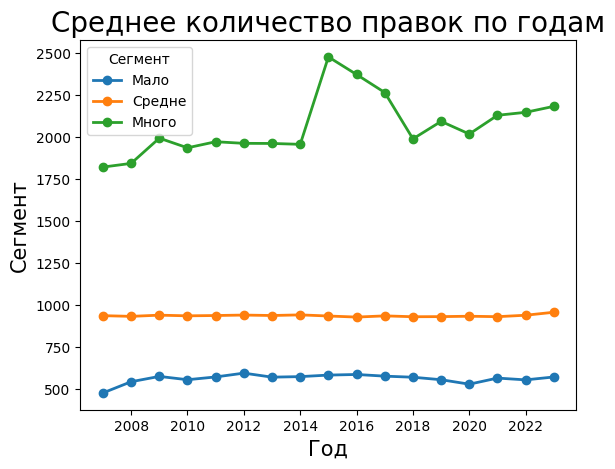

In [57]:
# После чего можем сформировать сводную по среднему количеству правок в каждой из категорий пользовталей
edits_per_year = stats.pivot_table(
    index='seg',
    columns='year',
    values='edits',
    aggfunc='mean')

plt.figure(figsize=(15, 10))
edits_per_year.T.plot.line(marker='o', linewidth=2, markersize=6)
plt.title('Среднее количество правок по годам', fontsize=20, color='black')
plt.xlabel('Год', fontsize=15, color='black')
plt.ylabel('Сегмент', fontsize=15, color='black')
plt.legend(title='Сегмент')
plt.show()

На основании полученого графика можно сделать следующий вывод: Не смотря на то что в сегменте 'Много' количество пользователей меньше чем в остальных, данный сегмент во все года превосходит два остальных сегмента. Мексимально продуктивный для этого сегмента год 2015 в среднем за год пользователи данного сегмента соверили по 2478 правок. А меньше всего в 2008 году. При этом заметна тенденция к росту среднего значения именно в сегменте 'Много'

**Вывод:**

1) В среднем, наименьшее количество правок было сделано в 2008 году, а наибольшее количество правок было сделано в 2015 году. Это указывает на тенденцию к увеличению количества правок с течением времени.

2) Важно отметить, что данные за 2007 и 2023 годы не могут быть учтены, так как у нас есть информация только за часть года.

3) Минимальное значение в столбце "правок" равно 0, а максимальное значение равно 56001. Большая часть данных находится в диапазоне от 0 до 2000 правок. Среднее значение (медиана) составляет 865 правок.

4) Сегмент "Много" имеет меньшее количество пользователей по сравнению с другими сегментами, но в каждом году этот сегмент превосходит два других сегмента по количеству правок. Наиболее продуктивным годом для этого сегмента является 2015 год, когда пользователи этого сегмента сделали в среднем 2478 правок за год. Наименьшее количество правок было сделано в 2008 году. Также заметна тенденция к росту среднего значения в сегменте "Много".


### 3.3 Среднее время онлайн

In [58]:
# Первоначально посмотрим на основные показатели столбца с помощью describe
stats['time'].describe()

count    28950.000000
mean      3721.710535
std       2000.832001
min         55.000000
25%       2460.000000
50%       3240.000000
75%       4440.000000
max      28320.000000
Name: time, dtype: float64

Видим что медиана составила 3240 минут, при этом максимальное значение целых 28320 минут. Из чего можно сделать выввод что основная масса пользователей проводит около 5000 минут онлайн(около 83 часов).

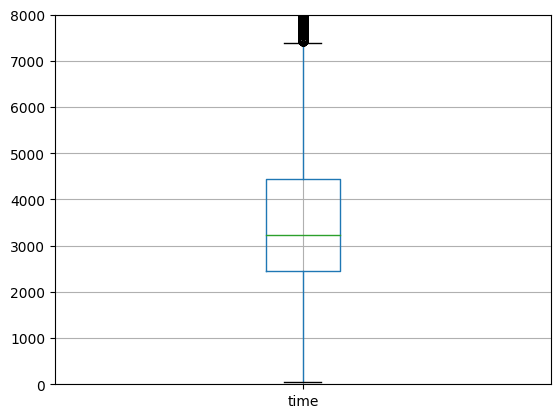

In [59]:
# А так же для наглядности построим boxplot
stats.boxplot(column = ['time'])
plt.ylim(0,8000)
plt.show()

По графику видим что выбрасами являются все данные выше 7500 минут.

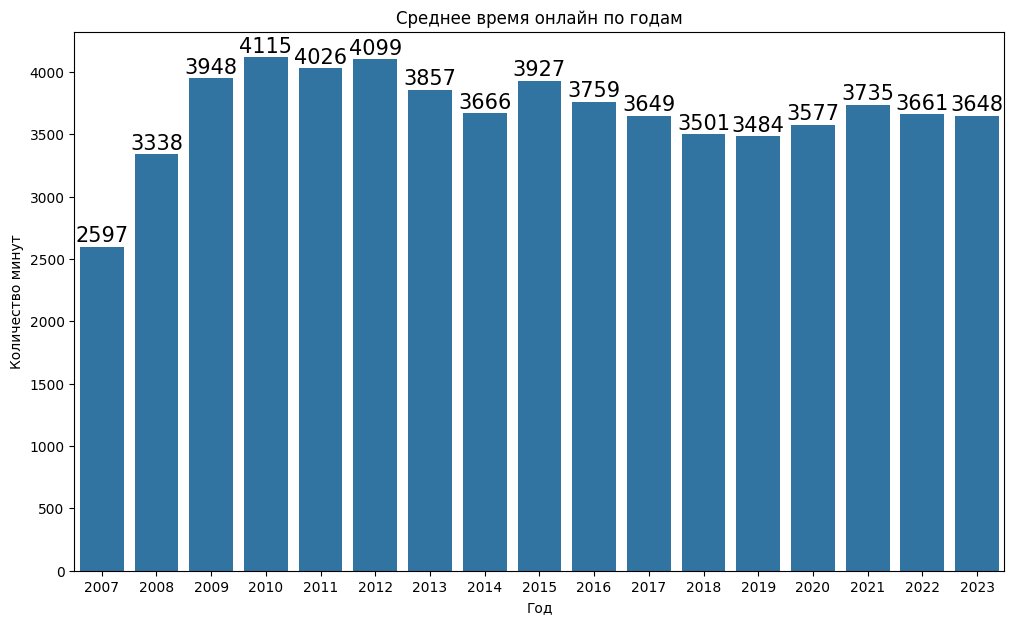

In [60]:
# Так же давайте посмотрим как менялось среднее время онлайн по годам
edit_year = pd.DataFrame({'Year': stats['year'].sort_values().unique().tolist(),
                   'Mean': stats.groupby('year')['time'].mean().tolist()})
edit_year.sort_values('Year', inplace=True)

plt.figure(figsize=(12, 7))

plots = sns.barplot(x=edit_year['Year'],
                    y=edit_year['Mean'],
                    data=edit_year)


for bar in plots.patches:

  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel("Год", size=10)
plt.ylabel("Количество минут", size=10)
plt.title("Среднее время онлайн по годам")
plt.show()

Согласно графика мы видим что пик среднего времени онлайн пришелся на 2010-2012 годы, Меньше всего этот показатель был в 2008 году всего 3338 минут.


In [61]:
# Теперь когда мы знаем основные показатели по столбцу можем сформировать группы
stats['seg_time'] = pd.cut(stats['time'], bins = [0,2700,4000,28320], labels=["0-2700", "2700-4000", "4000+"])
stats.groupby(['seg_time'])['user'].count()

seg_time
0-2700       9834
2700-4000    9806
4000+        9310
Name: user, dtype: int64

<Figure size 1500x1000 with 0 Axes>

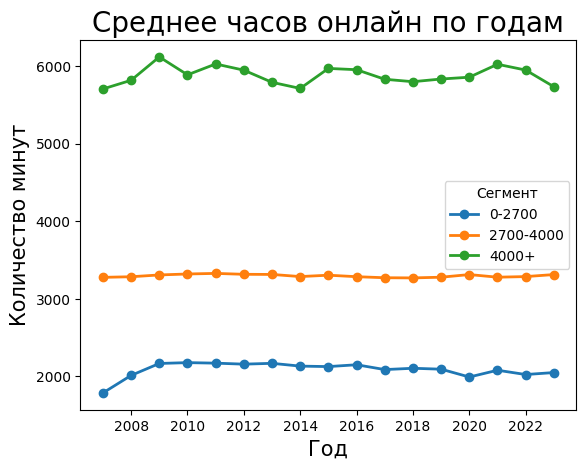

In [62]:
# После чего можем сформировать сводную по среднемуколичеству правок в каждой из категорий пользовталей
time_per_year = stats.pivot_table(
    index='seg_time',
    columns='year',
    values='time',
    aggfunc='mean')

plt.figure(figsize=(15, 10))
time_per_year.T.plot.line(marker='o', linewidth=2, markersize=6)
plt.title('Среднее часов онлайн по годам', fontsize=20, color='black')
plt.xlabel('Год', fontsize=15, color='black')
plt.ylabel('Количество минут', fontsize=15, color='black')
plt.legend(title='Сегмент')
plt.show()

На основании графика можем сделать вывод что все три сегмента практически не менялись в течении с 2007 по 2023 года. Более заметные колебания были в группе 4000+ остальные две практически не менялись в значениях.

**Вывод:**

1) Медианное значение времени онлайн составляет 3240 минуты, а максимальное значение равно 28320 минутам. Это означает, что основная масса пользователей проводит около 5000 минут онлайн, что составляет примерно 83 часа.

2) График показывает, что выбросами являются все данные, превышающие 7500 минут.

3) Пик среднего времени онлайн приходится на 2010-2012 годы. Наименьшее значение этого показателя было в 2008 году - всего 3338 минут.

4) График позволяет сделать вывод, что все три сегмента практически не менялись с 2007 по 2023 год. Наблюдаются более заметные колебания в группе "4000+", в то время как два других сегмента практически не менялись по значениям.

### 3.4 Активность при голосовании.

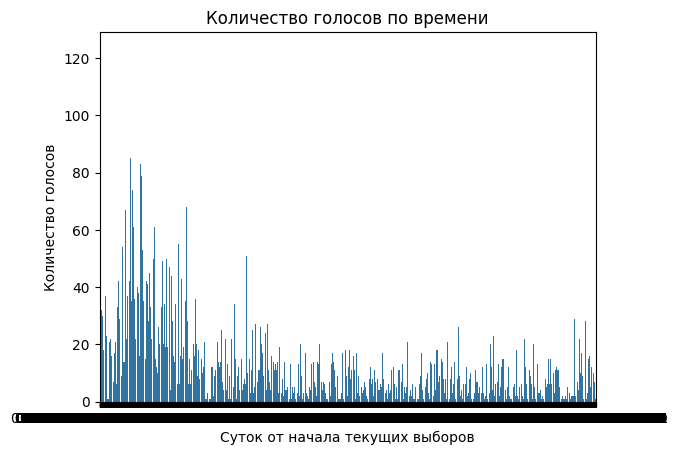

In [63]:
# Первым делом посмотрим на активность голосования. Насколько активно пользователи голосуют в интервале времени.

sns.countplot(data=votes, x='lt')
plt.xlabel('Суток от начала текущих выборов')
plt.ylabel('Количество голосов')
plt.title('Количество голосов по времени')
plt.show()

Видим что пользователи более активны на старте выборов и чем больше времени прошло с момента начала тем менее активны пользователи.

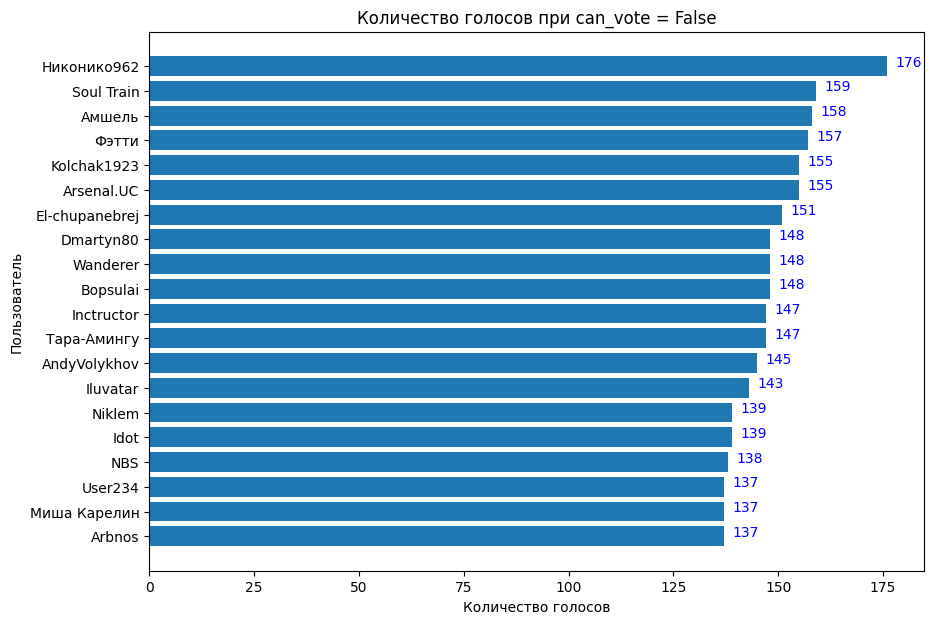

In [64]:
# У нас есть поле can_vote. Можно предположить что это критерии по которым определяется возможность голосовать.
# Но тогда не понятно почему если параметр False пользователи все равно смогли проголосовать.
# Выведем топ пользователей с критерием False по количеству голосов.
top_can_vote = votes.loc[votes['can_vote'] == False].groupby('user')['vote'].count().sort_values(ascending = False)
plt.figure(figsize=(10, 7))
plt.barh(top_can_vote.head(20).index, top_can_vote.head(20).values)

plt.xlabel('Количество голосов')
plt.ylabel('Пользователь')
plt.title('Количество голосов при can_vote = False')
plt.gca().invert_yaxis()

for i, v in enumerate(top_can_vote.head(20).values):
    plt.text(v + 2, i, str(v), color='blue')

plt.show()

Видим что не смотря на параметр False в столбце can_vote есть достаточно большое количество пользователей кто голосовал. Возможно данный столбец несет другое значение. Но в таком случае не ясно какое.

In [65]:
# Для наглядности так же посмотрим сколько пользовталей имеют пометку False
user_with_false = pd.pivot_table(votes, index='can_vote', values='user', aggfunc='count')
total_users = user_with_false['user'].sum()
user_with_false['percentage'] = round((user_with_false['user'] / total_users) * 100,2)
user_with_false

,user,percentage
can_vote,,
False,21880,27.67
True,57194,72.33


28% пользователей имеют пометку False

In [66]:
# При этом у всех пользователей с признаком False есть голоса
votes.loc[votes['can_vote'] == False]['vote'].count()

21880

Выглядит очень странно что у нас есть поле с пометкой что пользователь по критериям не подходит, при этом все такие пользователи имеют голоса. Возможно эти голоса не учитываются в дальнейшем при подсчете.

In [67]:
# Следующий момент который хочется проверить это как голосавали пользователи. То есть соотношение голосов за и против.
user_sel = pd.pivot_table(votes, index='vote', values='user', aggfunc='count')
total_users = user_sel['user'].sum()
user_sel['percentage'] = round((user_sel['user'] / total_users) * 100,2)
user_sel

,user,percentage
vote,,
-1,32113,40.61
1,46961,59.39


По сводной таблице видим что голосов за было 59% а голосов против 41%

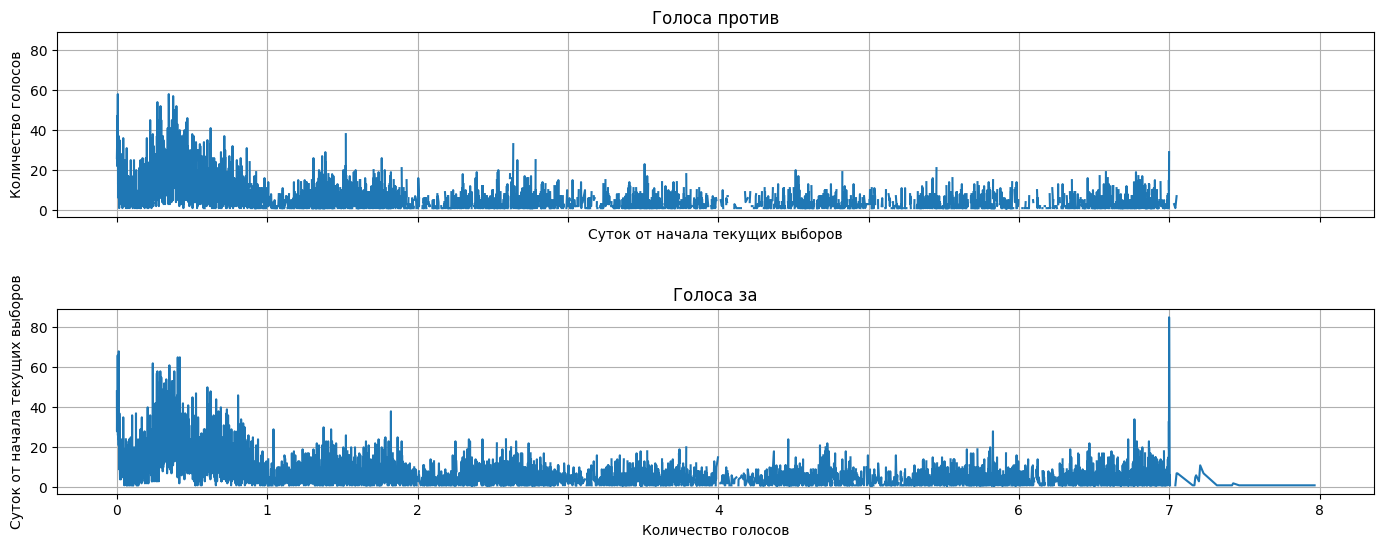

In [68]:
# Рассмотрим более детально данные две группы по времени
pivot_table = pd.pivot_table(votes, index='vote', columns = 'lt',values='user', aggfunc='count')
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(17, 6))

# Плот 1
ax1.plot(pivot_table.loc[-1])
ax1.set_title('Голоса против')
ax1.set_xlabel('Суток от начала текущих выборов')
ax1.set_ylabel('Количество голосов')
ax1.grid()

# Плот 1
ax2.plot(pivot_table.loc[1])
ax2.set_title('Голоса за')
ax2.set_xlabel('Количество голосов')
ax2.set_ylabel('Суток от начала текущих выборов')
ax2.grid()

plt.subplots_adjust(hspace=0.5)

plt.show()

Видим что в целом картина по голосам очень похожа. В обоих случаях пик активности приходится на первые сутки, а затем идет спад. Меньше всего активность на 4-5 сутки. При этом в обоих случаях активность незначительно повышается на 7 сутки. При чем голоса против больше не ставят после 7 суток, а вот голоса за все еще есть, но их количество стремится к нулю. Так же по пиковым значениям голосов за в некоторые интервалы больше 60, а вот против не поевышает этого значения. Плюс заметна разница в плотности голосования против в интервале с 3 суток и до 8. То есть плотность голосаования против меньше.

In [69]:
# Следующим шагом проведем сравнение по дням, для этого добавим столбец в таблицу
votes['day_after_vote'] = votes['lt'].divmod(1)[0] + 1

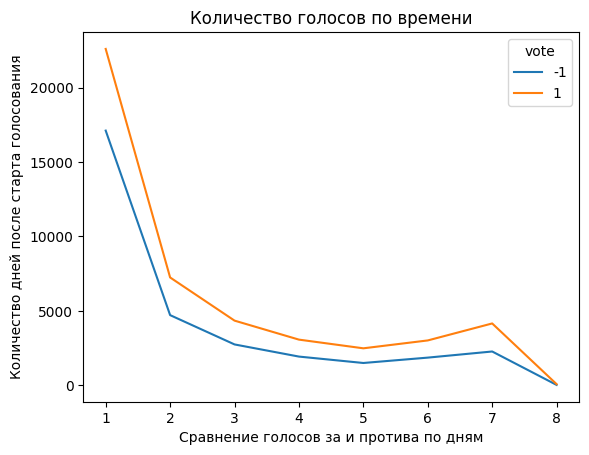

In [70]:
# А затем выведем данные на график
p = pd.pivot_table(votes, index='vote', columns = 'day_after_vote',values='user', aggfunc='count')

ax = p.loc[-1].plot(x='x', y='column1', kind='line')
p.loc[1].plot(x='x', y='column2', kind='line', ax=ax)
plt.xlabel('Сравнение голосов за и протива по дням')
plt.ylabel('Количество дней после старта голосования')
plt.title('Количество голосов по времени')
plt.legend(title='vote')

plt.show()

По графику видим тоже соотношение что и в процентах. Голосов за больше чем против. Но в целом линии повторяют друг друга.

**Вывод:**

1) Пользователи были более активны на старте выборов, и с течением времени их активность снижалась. Это может указывать на то, что пользователи проявляют больший интерес и участие в начальный период выборов.

2) Столбец "can_vote" имеет значение False у 28% пользователей. Несмотря на это, они все равно имеют голоса. Возможно, эти голоса не учитываются при подсчете или имеют другое значение.

3) По сводной таблице видно, что голосов "за" было 59%, а голосов "против" - 41%.

4) График показывает, что общая картина голосования очень похожа. Пик активности приходится на первые сутки, затем следует спад. На 4-5 сутки активность минимальна, а затем незначительно повышается на 7 сутки. Голоса "против" прекращаются после 7 суток, а голоса "за" все еще присутствуют, но их количество стремится к нулю. Также заметна разница в плотности голосования "против" в интервале с 3 до 8 суток, что может указывать на меньшую активность голосования "против".


### 3.5 Есть ли связь между временем онлайн и количеством голосов.

In [71]:
# Первым шагом сгруппируем таблица stats по user и посчитаем сумму времени онлайн
time_per_user = stats.groupby(['user'])['time'].sum()

In [72]:
# Затем посчитаем количество голосов по каждому пользователю
amount_of_votes = votes.groupby(['user'])['vote'].count()

In [73]:
# После чего объединим таблицы
votes_with_time = pd.merge(time_per_user, amount_of_votes, on='user')
votes_with_time

,time,vote
user,,
1.b2-b4,22140,15
1677venzel gottorpskij,8580,19
1Goldberg2,106140,91
43K1C7,7740,25
80 254 110 49,6060,4
...,...,...
ЯцекJacek,109920,167
पाणिनि,38160,79
もげ子,22320,88


In [74]:
# И посмотрим на корреляцию
votes_with_time.corr()

,time,vote
time,1.000000,0.263839
vote,0.263839,1.000000


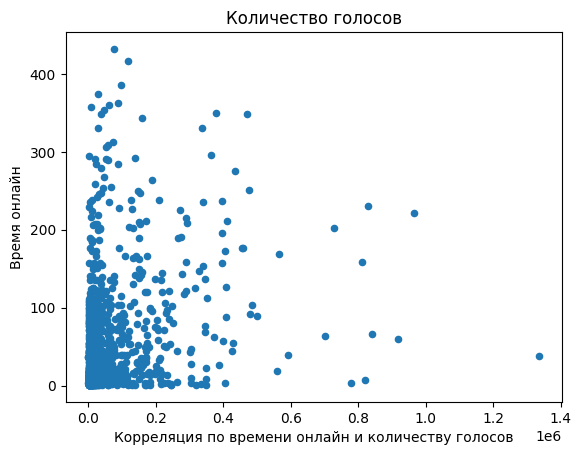

In [75]:
# Для наглядности построим график распределения
votes_with_time.plot(x='time', y='vote', kind='scatter')
plt.xlabel('Корреляция по времени онлайн и количеству голосов')
plt.ylabel('Время онлайн')
plt.title('Количество голосов')
plt.show()

**Вывод:**

Видим что явной зависимости между временем онлайн и количеством голосов не наблюдается.

### 3.5 Есть ли связь между суммой голосв и накопленной суммой добавленного

In [76]:
# Формируем таблицу по сумме добавленного
tsize_per_user = stats.groupby(['user'])['tot_size'].sum()

In [77]:
# Затем по кандидатам и сумме голосов
sum_of_votes = votes.groupby(['candidate'])['vote'].sum()

In [78]:
# После чего объединим таблицы
ts_s = pd.merge(sum_of_votes, tsize_per_user, left_on='candidate', right_on='user')
ts_s

,vote,tot_size
0,405,4.700000e+07
1,94,5.782200e+09
2,188,5.120000e+08
3,-101,1.800000e+08
4,-73,2.500000e+08
...,...,...
194,-91,3.379000e+08
195,-40,1.168000e+09
196,347,3.295700e+09
197,286,4.034000e+09


In [79]:
# И посмотрим на корреляцию.
ts_s.corr()

,vote,tot_size
vote,1.000000,0.283987
tot_size,0.283987,1.000000


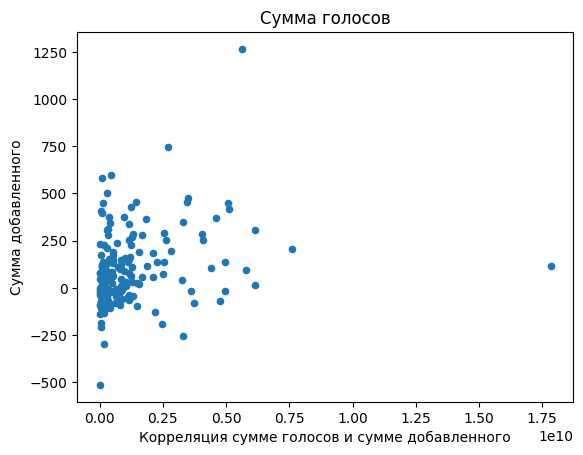

In [80]:
# Для наглядности построим график распределения
ts_s.plot(x='tot_size', y='vote', kind='scatter')
plt.xlabel('Корреляция сумме голосов и сумме добавленного')
plt.ylabel('Сумма добавленного')
plt.title('Сумма голосов')
plt.show()

**Вывод:**

Так же не наблюдаем явной зависимости между показателями.

## 3. Выводы

1) Пользователи, которые вносят больше правок, вносят больший объем добавленной информации. Это логично и указывает на положительную корреляцию между количеством правок и объемом добавленной информации.

2) Существует обратная зависимость между временем, прошедшим с момента последней активности пользователя, и накопленной суммой добавленной информации. Пользователи, которые активны недавно, обычно имеют большую накопленную сумму добавленной информации по сравнению с пользователями, которые были неактивны в течение длительного времени.

3) В среднем, наименьшее количество правок было сделано в 2008 году, а наибольшее количество правок было сделано в 2015 году. Это указывает на тенденцию к увеличению количества правок с течением времени.

4) Большая часть данных в столбце "edits" находится в диапазоне от 0 до 2000 правок. Среднее значение (медиана) составляет 865 правок.

5) Сегмент "Много"(более 1200 правок) имеет меньшее количество пользователей по сравнению с другими сегментами, но в каждом году этот сегмент превосходит два других сегмента по количеству правок. Наиболее продуктивным годом для этого сегмента является 2015 год, когда пользователи этого сегмента сделали в среднем 2478 правок за год. Наименьшее количество правок было сделано в 2008 году. Также заметна тенденция к росту среднего значения в сегменте "Много".

6) Медианное значение времени онлайн составляет 3240 минуты, а максимальное значение равно 28320 минутам. Это означает, что основная масса пользователей проводит около 5000 минут онлайн, что составляет примерно 83 часа.

7) Пик среднего времени онлайн приходится на 2010-2012 годы. Наименьшее значение этого показателя было в 2008 году - всего 3338 минут.

8) Пользователи были более активны на старте выборов, и с течением времени их активность снижалась. Это может указывать на то, что пользователи проявляют больший интерес и участие в начальный период выборов.

9) Столбец "can_vote" имеет значение False у 28% пользователей. Несмотря на это, они все равно имеют голоса. Возможно, эти голоса не учитываются при подсчете или имеют другое значение.

10) Пик активности приходится на первые сутки, затем следует спад. На 4-5 сутки активность минимальна, а затем незначительно повышается на 7 сутки. Голоса "против" прекращаются после 7 суток, а голоса "за" все еще присутствуют, но их количество стремится к нулю. Также заметна разница в плотности голосования "против" в интервале с 3 до 8 суток, что может указывать на меньшую активность голосования "против".

11) Явной зависимости между временем онлайн и количеством голосов не наблюдается.

12) Так же нет явной зависимости между суммой голосов и накопленной суммой добавленного.